In [15]:
import numpy as np # linear algebra
from numpy import genfromtxt # reading in data
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for visualization
import psycopg2 # for database access
import getpass # for password
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost
%matplotlib inline

In [16]:
# Read data from csv to numpy array
raw_mushroom_data = genfromtxt('mushrooms.csv', delimiter=',')
mushrooms = pd.read_csv('mushrooms.csv')

In [17]:
# Get password for database
password = getpass.getpass()

········


In [18]:
connection = psycopg2.connect("dbname='postgres' user='carsonstevens' host='flowers.mines.edu' password="+password)
cursor = connection.cursor()
# cur.execute("DROP TABLE IF EXISTS mushrooms;")
# execute_values(cursor, 'INSERT INTO foobar VALUES %s', values) #values is an array
# connection.commit()

In [19]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


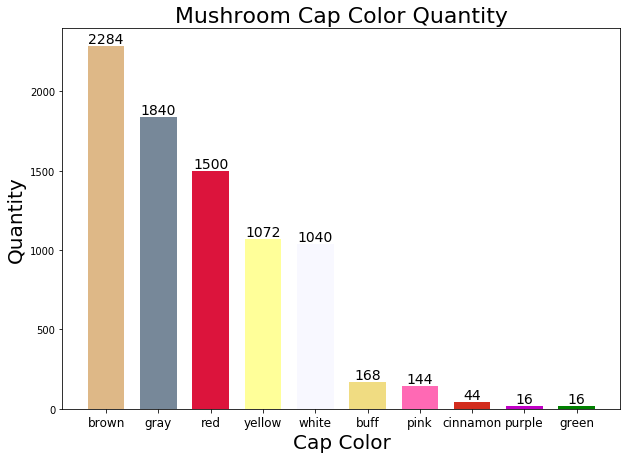

NameError: name 'odor_labels' is not defined

In [28]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
        
autolabel(mushroom_bars)        
plt.show() #Display bars. 

poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(mushrooms[mushrooms['odor'] == odor].index)
    edibles = len(mushrooms[(mushrooms['odor'] == odor) & (mushrooms['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

In [22]:
labelEncoder = preprocessing.LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelEncoder.fit_transform(mushrooms[col])

# Splitting test train set, with 30% of the data as the validation set
train, test = train_test_split(mushrooms, test_size = 0.3) 

In [23]:
# Train set
train_y = train['class']
train_x = train[[x for x in train.columns if 'class' not in x]]
# Test/Validation set
test_y = test['class']
test_x = test[[x for x in test.columns if 'class' not in x]]

models = [SVC(kernel='rbf', random_state=0), SVC(kernel='linear', random_state=0), XGBClassifier(), LogisticRegression()]
model_names = ['SVC_rbf', 'SVC_linear', 'xgboost', 'Logistic Regression']
for i, model in enumerate(models):
    model.fit(train_x, train_y)
    print ('The accurancy of ' + model_names[i] + ' is ' + str(accuracy_score(test_y, model.predict(test_x))) )

C:\Users\steve\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The accurancy of SVC_rbf is 1.0
The accurancy of SVC_linear is 0.9675963904840033
The accurancy of xgboost is 1.0
The accurancy of Logistic Regression is 0.9470877768662839


C:\Users\steve\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


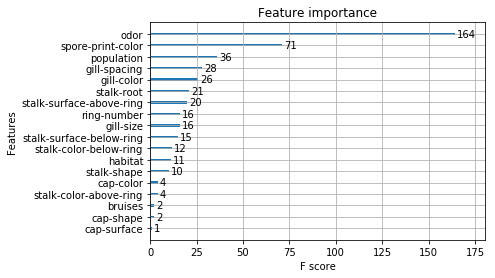

In [33]:
ax = xgboost.plot_importance(models[2])